In [1]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from types import SimpleNamespace
from data_2ends import make_dataloader

In [2]:
# Configure test parameters
config = SimpleNamespace(
    n_input_values=10,  # Range of possible values (1-9)
    seq_len=64,         # Length of sequence
    end_len=10,
    batch_size=4,      # Number of samples in batch
    num_samples=1_000,   # Total dataset size
    num_workers=10,      # Number of workers for dataloader
    cmap='rainbow',
)

In [3]:
# Create dataloader
dataloader = make_dataloader(config)

# Get one batch
batch = next(iter(dataloader))

In [4]:
def plot_sequence(batch_idx, data):
    """Plot a single sequence with its components"""
    fig, axes = plt.subplots(4, 1, figsize=(8, 6))
    fig.suptitle(f'Sample {batch_idx}')
    
    # Get min and max values from input for consistent color mapping
    input_min = data['input'].min().item()
    input_max = data['input'].max().item()

    # Position IDs
    sns.heatmap(data['pos_id'][batch_idx].unsqueeze(0), 
                ax=axes[0], cmap='rainbow', cbar=False)
    axes[0].set_title('Position IDs')

    # Masked Input
    sns.heatmap(data['input'][batch_idx].unsqueeze(0), 
                ax=axes[1], cmap='rainbow', 
                vmin=input_min, vmax=input_max)
    axes[1].set_title('Masked Input (0 represents masked positions)')
    
    # Target
    sns.heatmap(data['target'][batch_idx].unsqueeze(0), 
                ax=axes[2], cmap='rainbow',
                vmin=input_min, vmax=input_max)
    axes[2].set_title('Target (Original sequence with QA pair)')
    
    # Mask
    sns.heatmap(data['mask'][batch_idx].unsqueeze(0), 
                ax=axes[3], cmap='bwr')
    axes[3].set_title('Mask (1 represents masked positions)')
    
    plt.tight_layout()
    return fig

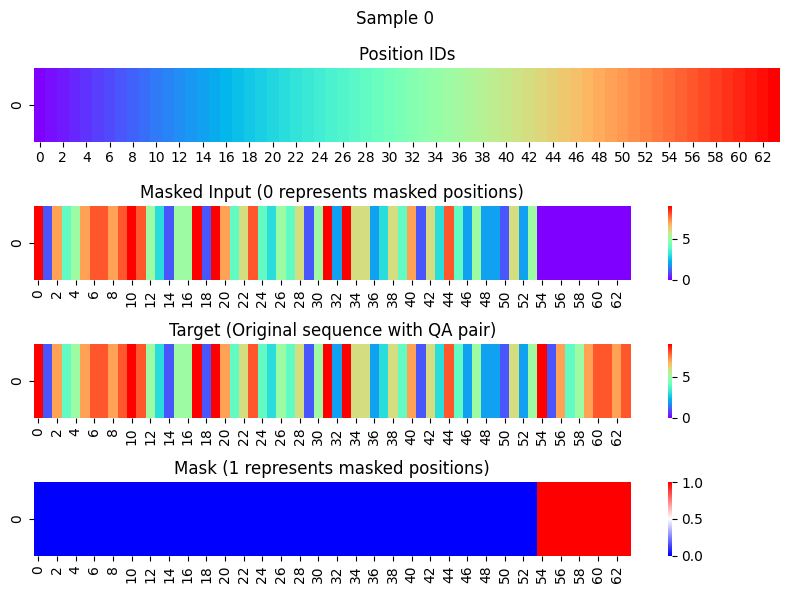

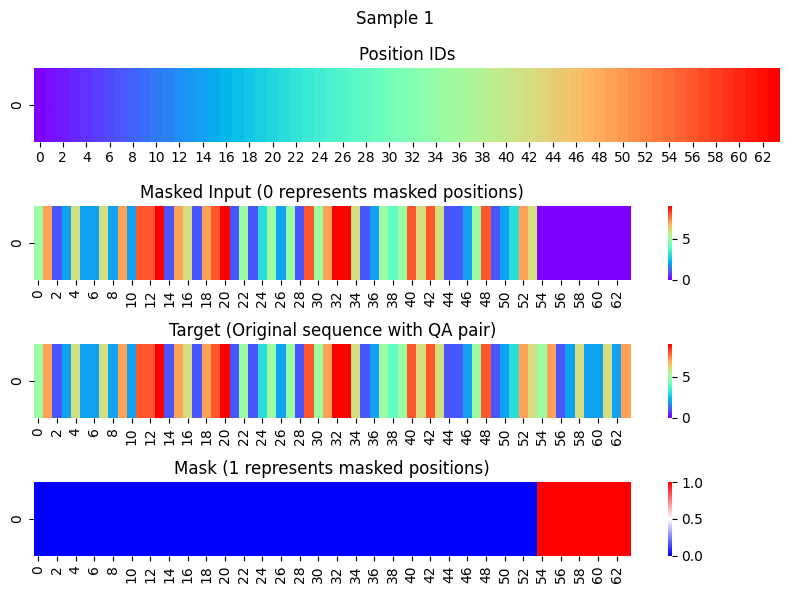

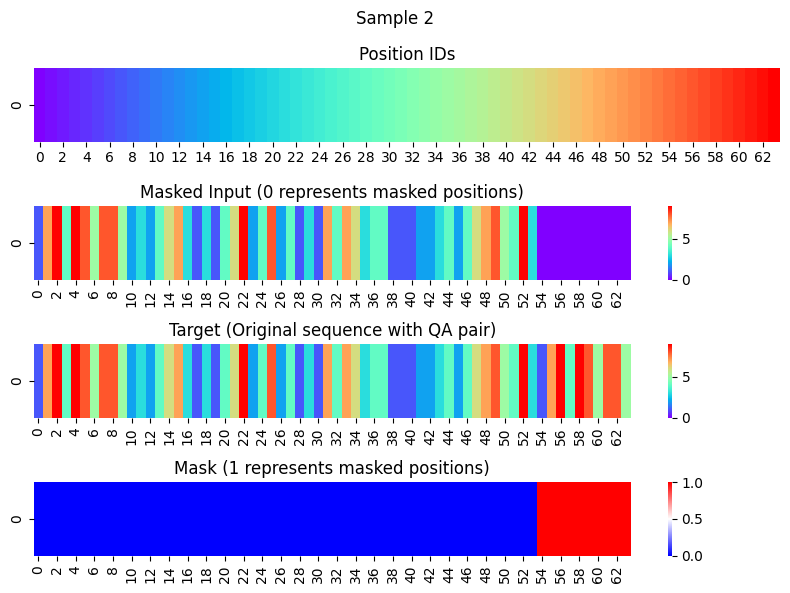

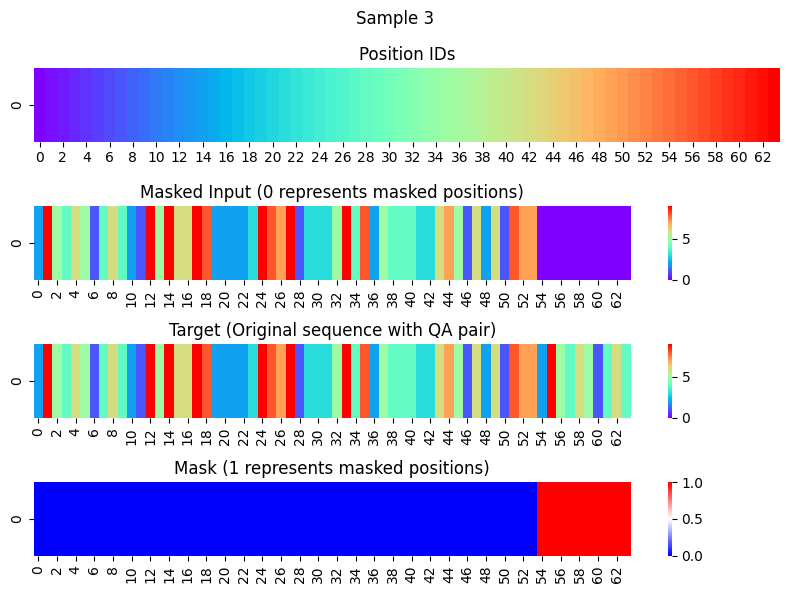

In [5]:
# Plot each sample in the batch
for i in range(config.batch_size):
    fig = plot_sequence(i, batch)
    plt.show()

In [6]:
# Verification checks
def verify_data(batch):
    print("Verification Results:")
    
    # Check shapes
    print(f"\nShapes:")
    for key, value in batch.items():
        print(f"{key}: {value.shape}")
    
    # Verify mask positions match zeros in input
    mask_matches = torch.all((batch['mask'] == 1) == (batch['input'] == 0))
    print(f"\nMask positions match zeros in input: {mask_matches}")
    
    # Verify non-masked positions match between input and target
    non_masked_match = torch.all(
        batch['input'] * (1 - batch['mask'].int()) == 
        batch['target'] * (1 - batch['mask'].int())
    )
    print(f"Non-masked positions match between input and target: {non_masked_match}")
    
    # Check if values are within expected range
    input_range = (batch['input'].min(), batch['input'].max())
    target_range = (batch['target'].min(), batch['target'].max())
    print(f"\nValue ranges:")
    print(f"Input values range: {input_range}")
    print(f"Target values range: {target_range}")
    
verify_data(batch)

Verification Results:

Shapes:
pos_id: torch.Size([4, 64])
input: torch.Size([4, 64])
target: torch.Size([4, 64])
mask: torch.Size([4, 64])

Mask positions match zeros in input: True
Non-masked positions match between input and target: True

Value ranges:
Input values range: (tensor(0), tensor(9))
Target values range: (tensor(1), tensor(9))


In [7]:
from data_2ends import make_batch
batch = make_batch(config)
for k, v in batch.items():
    print(k, v.shape)

pos_id torch.Size([4, 64])
input torch.Size([4, 64])
target torch.Size([4, 64])
mask torch.Size([4, 64])
